In [46]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np

import sys as sys
sys.path.append('..')

from bayes.regression.linearparametric import BayesLinear as Model
from bayes.regression.linearparametric.bases import polynomialType as phi

### Test Data

<IPython.core.display.Javascript object>


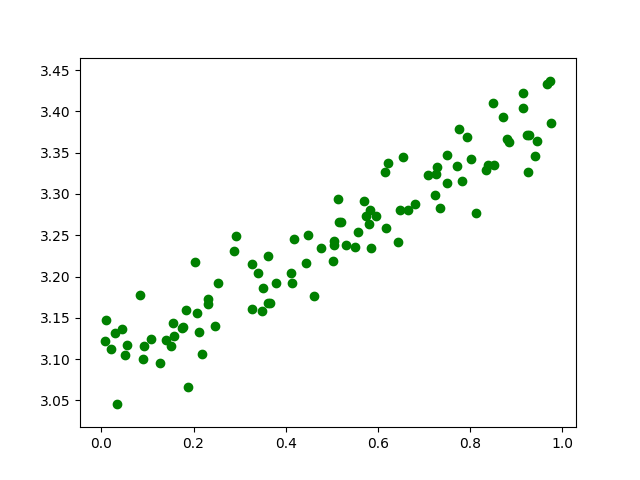

In [47]:
m_true = 0.3
b_true = 3.1
N = 100
std = .03

tx = np.random.rand(N)
ty = np.random.randn(N) * std + (tx*m_true + b_true)

plt.scatter(tx, ty, c='green')

### Structured Noise

<IPython.core.display.Javascript object>


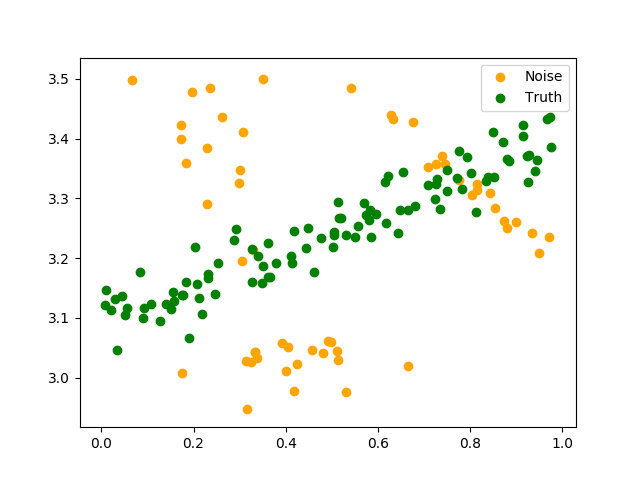

In [56]:
n1 = np.random.randn(15, 2)*0.1 + np.array([0.2, 3.35])
n2x = np.random.randn(20) * 0.1 + 0.8
n2y = np.random.randn(20) * 0.02 + (n2x*-0.6 + 3.8)
n3x = np.random.randn(20) * 0.1 + 0.4
n3y = np.random.randn(20) * 0.02 + (n2x*-0.1 + 3.1)

plt.scatter(n1[:, 0], n1[:, 1], c='orange', label="Noise")
plt.scatter(n2x, n2y, c='orange')
plt.scatter(n3x, n3y, c='orange')
plt.scatter(tx, ty, c='green', label="Truth")
plt.legend()

x = np.hstack((tx, n1[:, 0], n2x, n3x))[:, None]
t = np.hstack((ty, n1[:, 1], n2y, n3y))

### Fit

In [57]:
fit = Model(phi, [{"p": 1}, {"p": 0}], noiseStdDev=0.1, priorStdDev=0.4, priorMean=0.)
fit.train(x, t)

ValueError: shapes (2,155,1) and (1,155,2) not aligned: 1 (dim 2) != 155 (dim 1)

In [53]:
print(x.shape)
print(t.shape)

(155, 1)
(155,)
